In [1]:
import librosa
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

In [5]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    duration = round(librosa.get_duration(X, sample_rate),2)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0) # stft used
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0) # stft used
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz,duration

def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    lengths = dict()
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
              mfccs, chroma, mel, contrast,tonnetz, duration = extract_feature(fn)
              if duration in lengths:
                    lengths[duration] = lengths[duration] + 1
              else:
                    lengths[duration] = 1
            except Exception as e:
              print("Error encountered while parsing file: ", fn)
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[-1].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int),lengths

parent_dir = 'UrbanSound8K/audio'
tr_sub_dirs = ["fold1","fold2"]
tr_features, tr_labels, lengths = parse_audio_files(parent_dir,tr_sub_dirs)


/Users/Gundeep/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/Users/Gundeep/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1632: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/Users/Gundeep/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1644: RuntimeWarning: invalid value encountered in maximum
  Z = np.maximum(X, X_ref).astype(dtype)
/Users/Gundeep/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1645: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


Error encountered while parsing file:  UrbanSound8K/audio/fold1/87275-1-2-0.wav
lengths - {4.0: 1478, 1.64: 1, 2.61: 1, 1.38: 1, 3.24: 1, 0.52: 1, 3.15: 1, 2.04: 2, 2.59: 1, 2.37: 2, 1.7: 4, 3.08: 2, 0.65: 1, 1.11: 3, 1.03: 3, 1.19: 2, 0.69: 4, 0.49: 3, 0.45: 3, 2.77: 2, 0.25: 2, 0.19: 1, 0.36: 1, 0.31: 1, 0.47: 1, 1.16: 1, 3.45: 1, 1.99: 2, 1.68: 2, 0.88: 2, 0.94: 1, 0.87: 3, 1.01: 3, 0.24: 1, 1.44: 2, 0.21: 2, 2.36: 1, 2.46: 3, 2.87: 1, 3.04: 1, 2.09: 2, 2.53: 1, 2.32: 1, 2.41: 1, 2.54: 2, 3.18: 1, 0.74: 1, 0.55: 1, 0.8: 3, 1.05: 2, 1.95: 1, 0.35: 4, 0.54: 2, 2.6: 1, 0.66: 2, 1.04: 1, 2.71: 1, 2.39: 1, 3.14: 1, 0.96: 2, 1.53: 2, 1.81: 1, 1.28: 2, 1.83: 2, 1.33: 2, 1.93: 2, 1.96: 2, 1.71: 1, 2.08: 1, 3.53: 1, 0.61: 5, 0.39: 3, 1.14: 4, 1.42: 2, 1.32: 2, 1.5: 1, 1.51: 1, 1.35: 1, 1.46: 3, 0.46: 2, 1.09: 2, 0.89: 2, 1.72: 1, 2.25: 2, 1.22: 1, 3.96: 1, 0.63: 2, 3.48: 1, 0.15: 1, 0.05: 1, 0.06: 2, 0.07: 1, 0.11: 1, 1.66: 1, 0.42: 2, 2.3: 1, 1.73: 1, 0.83: 1, 0.37: 4, 0.99: 2, 3.46: 1, 2.8

In [134]:
def analyse_file(path):
    try:
      X, sample_rate = librosa.load(path, mono=False)
      print(X.shape)
    except Exception as e:
      print("Error encountered while parsing file: ", path)
    return X



parent_dir = 'UrbanSound8K/audio'
tr_sub_dirs = 'fold1'
path = os.path.join(parent_dir,tr_sub_dirs,'9031-3-2-0.wav')
# path = '/Users/Gundeep/Music/hona_nai.mp3'
x = analyse_file(path)



(50662,)


In [131]:
x.shape

(2, 1588932)

In [64]:
arr_len = np.empty((len(lengths), 2), dtype = np.int32)
arr_len[:,0] = (np.array((list((lengths.keys())))) * 4.0).astype(np.int32)
arr_len[:,1] = np.array(list(lengths.values())).astype(np.int32)

In [87]:
hist_list = []
for ln in range(arr_len.shape[0]):
    for times in range(arr_len[ln][1]):
        hist_list.append(arr_len[ln][0])

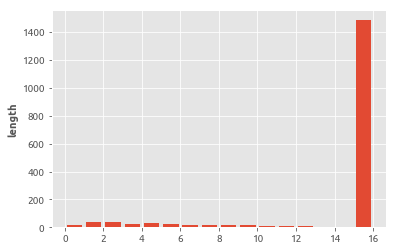

In [104]:
%matplotlib inline
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.hist(hist_list, bins, histtype='bar', rwidth=0.8)
plt.ylabel('length');

In [ ]:
%matplotlib inline
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.hist(hist_list, bins, histtype='bar', rwidth=0.8)
plt.ylabel('length');

In [112]:
freqs[0:10]

[22050, 22050, 22050, 22050, 22050, 22050, 22050, 22050, 22050, 22050]

In [116]:
freqs == [22050 for x in range(len(freqs))]

True